In [15]:
import json 
import tweepy
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
consumer_key = "E4KWCdr3WaSkZvtdGi0fTorKA"
consumer_secret =  "BjOPzr6HARhsWpDpt6GL7qQtlAVjNnq4jCxTurTyCZ5oaz5j2x"
access_token =  "616460006-yu97qY1Hadeqv6imnfmZwweJvOLSTYdCEz3jvO5J"
access_token_secret = "V9gdaJOA4agtU3dq7ziuxsbSMeoTLrmAcaCEchJK7TDkY"

In [3]:
analyzer = SentimentIntensityAnalyzer()

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [92]:
#BBC, CBS, CNN, Fox, and New York times
channels = ['@BBCWorld','@CBSNews','@CNN','@FOXLA','@nytimes']

news_tweets = {}
for channel in channels:
    tweets = []
    for x in range(5):
        try:
            public_tweets = api.user_timeline(channel, page=x)
            print("Fetching: {} Page: {} Status: Successful".format(channel,x+1))
        except:
            print("Fetching: {} Page: {} Status: Failed".format(channel,x+1))
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            tweets.append(results['compound'])
        news_tweets[channel] = tweets

Fetching: @BBCWorld Page: 1 Status: Successful
Fetching: @BBCWorld Page: 2 Status: Successful
Fetching: @BBCWorld Page: 3 Status: Successful
Fetching: @BBCWorld Page: 4 Status: Successful
Fetching: @BBCWorld Page: 5 Status: Successful
Fetching: @CBSNews Page: 1 Status: Successful
Fetching: @CBSNews Page: 2 Status: Successful
Fetching: @CBSNews Page: 3 Status: Successful
Fetching: @CBSNews Page: 4 Status: Successful
Fetching: @CBSNews Page: 5 Status: Successful
Fetching: @CNN Page: 1 Status: Successful
Fetching: @CNN Page: 2 Status: Successful
Fetching: @CNN Page: 3 Status: Successful
Fetching: @CNN Page: 4 Status: Successful
Fetching: @CNN Page: 5 Status: Successful
Fetching: @FOXLA Page: 1 Status: Successful
Fetching: @FOXLA Page: 2 Status: Successful
Fetching: @FOXLA Page: 3 Status: Successful
Fetching: @FOXLA Page: 4 Status: Successful
Fetching: @FOXLA Page: 5 Status: Successful
Fetching: @nytimes Page: 1 Status: Successful
Fetching: @nytimes Page: 2 Status: Successful
Fetching: @ny

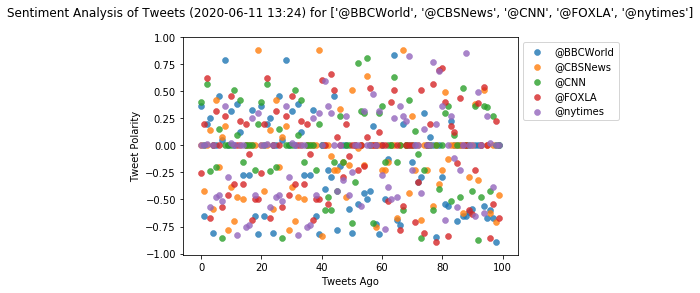

In [84]:
# Create scatter plot
for channel in channels:
    plt.scatter(np.arange(len(news_tweets['@BBCWorld'])),
             news_tweets[channel], marker="o", linewidth=0.5,
             alpha=0.8,label = channel)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({}) for {}\n".format(now, channels))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

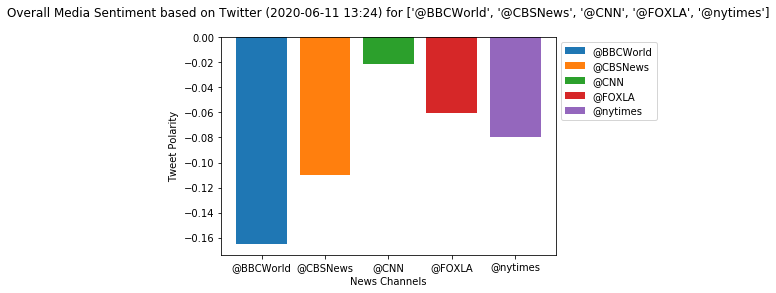

In [85]:
mean_composite = [np.mean(news_tweets[channel]) for channel in channels]

for i in range(len(mean_composite)):
    plt.bar(channels[i],mean_composite[i],label=channels[i])
    
# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Overall Media Sentiment based on Twitter ({}) for {}\n".format(now, channels))
plt.ylabel("Tweet Polarity")
plt.xlabel("News Channels")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()